<a href="https://colab.research.google.com/github/asafdari-boop/ComputationalPhyiscsLibrary/blob/main/LinearEqns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrix operations

In [ ]:
import numpy as np
import pprint as pprint

a = np.array([[1, 2], [3, 4]])
b = np.array([[11, 12], [13, 14]])
pprint.pprint(a)
pprint.pprint(b)

# array operation
c = a*b
pprint.pprint(c)

d = a@b
pprint.pprint(d)

array([[1, 2],
       [3, 4]])
array([[11, 12],
       [13, 14]])
array([[11, 24],
       [39, 56]])
array([[37, 40],
       [85, 92]])


In [ ]:
# matrix operation
e = np.matrix("1, 2; 3, 4")
f = np.matrix("11, 12; 13, 14")

g = e*f
pprint.pprint(g)

h = e@f
pprint.pprint(h)

matrix([[37, 40],
        [85, 92]])
matrix([[37, 40],
        [85, 92]])


In [ ]:
# list to array
a = [1, 2, 3, 4]
a_array = np.array(a)
print(a_array)

a_2d_array = np.reshape(a_array, (2, 2))
print(a_2d_array)

[1 2 3 4]
[[1 2]
 [3 4]]


In [ ]:
# array to matrix
c = np.array([1, 2, 3, 4])
d = np.array([2, 3, 4, 5])
d_transpose = np.reshape(d, (4, 1))
print(c)
print(d_transpose)

m = np.asmatrix(c)
n = np.asmatrix(d_transpose)
k = m*n
print(k)

[1 2 3 4]
[[2]
 [3]
 [4]
 [5]]
[[40]]


#Matrix multiplication

In [ ]:
import numpy as np
import pprint as pprint

# multiply two matrices A*B
def matrix_multiply(A, B):    
  rowsA, rowsB = len(A), len(B)
  colsA, colsB = len(A[0]), len(B[0])
  if colsA != rowsB:
    raise ArithmeticError('Number of A columns must equal number of B rows.')
 
  C = np.zeros((rowsA, colsB))
  for i in range(rowsA):
      for j in range(colsB):
          total = 0
          for k in range(colsA):
              total += A[i][k] * B[k][j]
          C[i][j] = total
 
  return C

A = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
B = np.array([[1], [2], [3], [4]])
C = matrix_multiply(A, B)

pprint.pprint(C)

D = A@B
pprint.pprint(D)

array([[30.],
       [70.]])
array([[30],
       [70]])


#Determinant of a matrix using recursion

For a $2 \times 2$ matrix, we have 
$|A| = \begin{vmatrix}
a & b \\
c & d
\end{vmatrix}=ad-bc$. 

For a $3 \times 3$ matrix, we have:  
$|A| = \begin{vmatrix}
a & b & c\\
d & e & f \\
g & h & i
\end{vmatrix}=
a \times (-1)^{1+1} \times \begin{vmatrix}
e & f \\
h & i
\end{vmatrix} + 
b \times (-1)^{1+2} \times \begin{vmatrix}
d & f \\
g & i
\end{vmatrix} + 
c \times (-1)^{1+3} \times \begin{vmatrix}
d & e \\
g & h
\end{vmatrix} \\
= aei + bfg + cdh - ceg - bdi - afh
$

In [ ]:
import numpy as np 
import pprint as pprint
import numpy.linalg as linalg

def determinant_recursive(A, total=0):
    indices = list(range(len(A)))
    
    rowsA, colsA = len(A), len(A[0])
    if colsA != rowsA:
      raise ArithmeticError('A must be a square matrix to calculate the determinant')
 
    # when at 2x2 submatrices recursive calls end
    if len(A) == 2 and len(A[0]) == 2:
        val = A[0][0] * A[1][1] - A[1][0] * A[0][1]
        return val
 
    # define submatrix for each focus column
    for fc in indices:
        As = A.copy() 
        As = As[1:]   # remove the first row
        height = len(As)
 
        # for each remaining row of submatrix, remove the focus column elements
        # so that As now is the matrix with the fc-th column removed
        for i in range(height):             
            As[i] = As[i][0:fc] + As[i][fc+1:]  # As[i] is a list with the fc-th element removed
 
        # find the sign
        sign = (-1) ** (fc % 2)         

        # pass submatrix recursively
        sub_det = determinant_recursive(As)
        
        # total all returns from recursion
        total += sign * A[0][fc] * sub_det 
        print(" Sign: ", sign, " value: ", A[0][fc], " submatrix = ", As)        

    return total

#A = [[1,2,3],[8,5,6],[9,12,10]]
A = [[1,2,3, 4],[8,5,6, 7],[9,12,10,14],[13,14,16,15]]

pprint.pprint(A)

npDet = linalg.det(A)
print("The Numpy Determinant of A is", round(npDet,9))

Det = determinant_recursive(A)
print("Determinant of A is", Det)
print()

[[1, 2, 3, 4], [8, 5, 6, 7], [9, 12, 10, 14], [13, 14, 16, 15]]
The Numpy Determinant of A is -459.0
 Sign:  1  value:  5  submatrix =  [[10, 14], [16, 15]]
 Sign:  -1  value:  6  submatrix =  [[12, 14], [14, 15]]
 Sign:  1  value:  7  submatrix =  [[12, 10], [14, 16]]
 Sign:  1  value:  1  submatrix =  [[5, 6, 7], [12, 10, 14], [14, 16, 15]]
 Sign:  1  value:  8  submatrix =  [[10, 14], [16, 15]]
 Sign:  -1  value:  6  submatrix =  [[9, 14], [13, 15]]
 Sign:  1  value:  7  submatrix =  [[9, 10], [13, 16]]
 Sign:  -1  value:  2  submatrix =  [[8, 6, 7], [9, 10, 14], [13, 16, 15]]
 Sign:  1  value:  8  submatrix =  [[12, 14], [14, 15]]
 Sign:  -1  value:  5  submatrix =  [[9, 14], [13, 15]]
 Sign:  1  value:  7  submatrix =  [[9, 12], [13, 14]]
 Sign:  1  value:  3  submatrix =  [[8, 5, 7], [9, 12, 14], [13, 14, 15]]
 Sign:  1  value:  8  submatrix =  [[12, 10], [14, 16]]
 Sign:  -1  value:  5  submatrix =  [[9, 10], [13, 16]]
 Sign:  1  value:  6  submatrix =  [[9, 12], [13, 14]]
 Sign

# Gauss elimination and pivoting

**Gauss elimination and backsubstituion**
```
# divide by the diagonal element
div = A[m, m]
A[m, :] /= div
V[m] /= div
    
# now subtract from the lower rows
for i in range(m+1, n):
  mult = A[i, m]
  A[i, :] -= mult*A[m, :]
  V[i] -= mult*V[m]

# backsubstituion
x = np.empty(n, float)
for m in range(n-1, -1, -1):
 x[m] = V[m]
 for i in range(m+1, n):
   x[m] -= A[m, i]*x[i]
```

**Pivoting**

In [ ]:
## swap row i and row j for a Matrix M
def swapRows(M, i, j):
    if M.ndim == 1:
        M[i], M[j] = M[j], M[i]
    else:
        temp = M[i].copy()
        M[i] = M[j]
        M[j] = temp

## swap column i and column j for a Matrix M
def swapCols(M, i, j):
    temp = M[:, j].copy()
    M[:, j] = M[:, i]
    M[:, i] = temp

In [ ]:
import numpy as np
import pprint

def gaussPivot(A_matrix, V_matrix, err = 1.0e-9):
    A = A_matrix.copy()
    V = V_matrix.copy()
  
    n = len(V)
    
    # loop over each row
    for m in range(n):
        print("\n For row: ", m)
        # Row interchange, if needed
        # argmax returns the indices of the maximum values along an axis for an array
        # this array is a subarray of A, it is a column array A[m:n, m], which is the mth column, and the rows go from m to n-1 
        # p will be the row with the maximum element
        # need to add m for the p calculation to get the absolute row number 
        p = np.argmax(abs(A[m:n, m])) + m  
        print("The row with the largest element is : ", p)
        if abs(A[p, m]) < err:
            print("Matrix is singular")

        if p != m:  # swap row p with row k for all relevant (matrices A and V here)
            print(f"Swapping row {p} with row {m} ...")
            swapRows(A, m, p)
            swapRows(V, m, p)            

        pprint.pprint(A)
        pprint.pprint(V)

        # Gaussian elimination, divide by the diagonal element
        div = A[m, m]
        A[m, :] /= div
        V[m] /= div
    
        # now subtract from the lower rows
        for i in range(m+1, n):
            mult = A[i, m]
            A[i, :] -= mult*A[m, :]
            V[i] -= mult*V[m]

        print("After elimination: ")
        pprint.pprint(A)
        pprint.pprint(V)
         
    # check the error                    
    if abs(A[n-1, n-1]) < err:
        print("Matrix is singular")

    # backsubstituion
    x = np.empty(n, float)
    for m in range(n-1, -1, -1):
        x[m] = V[m]
        for i in range(m+1, n):
            x[m] -= A[m, i]*x[i]

    # return the values
    return x

A = np.array([[ 2,  1,  4,  1 ],
              [ 3,  4, -1, -1 ],
              [ 1, -4,  1,  5 ],
              [ 2, -2,  1,  3 ]], float)
V = np.array([ -4, 3, 9, 7 ], float)

print("A:")
pprint.pprint(A)
print("V:")
pprint.pprint(V)

X = gaussPivot(A, V)
print("X=")
pprint.pprint(X)

A:
array([[ 2.,  1.,  4.,  1.],
       [ 3.,  4., -1., -1.],
       [ 1., -4.,  1.,  5.],
       [ 2., -2.,  1.,  3.]])
V:
array([-4.,  3.,  9.,  7.])

 For row:  0
The row with the largest element is :  1
Swapping row 1 with row 0 ...
array([[ 3.,  4., -1., -1.],
       [ 2.,  1.,  4.,  1.],
       [ 1., -4.,  1.,  5.],
       [ 2., -2.,  1.,  3.]])
array([ 3., -4.,  9.,  7.])
After elimination: 
array([[ 1.        ,  1.33333333, -0.33333333, -0.33333333],
       [ 0.        , -1.66666667,  4.66666667,  1.66666667],
       [ 0.        , -5.33333333,  1.33333333,  5.33333333],
       [ 0.        , -4.66666667,  1.66666667,  3.66666667]])
array([ 1., -6.,  8.,  5.])

 For row:  1
The row with the largest element is :  2
Swapping row 2 with row 1 ...
array([[ 1.        ,  1.33333333, -0.33333333, -0.33333333],
       [ 0.        , -5.33333333,  1.33333333,  5.33333333],
       [ 0.        , -1.66666667,  4.66666667,  1.66666667],
       [ 0.        , -4.66666667,  1.66666667,  3.66666667

**Banded matrix**

Variation in a one-dimensional system: a set of N identiacal masses in a row, joined by identical linear springs

$
\begin{pmatrix}
(\alpha-k) & -k \\
-k & \alpha & -k \\
& -k & \alpha & -k \\
& & & & \cdots \\
& & & & & \cdots \\
& & & & & -k & \alpha & -k \\
& & & & &  & -k & (\alpha-k) \\
\end{pmatrix}$ 
$
\begin{pmatrix}
x_1 \\
x_2 \\
x_3 \\
\cdots \\
\cdots \\
x_{N-1} \\
x_N \\
\end{pmatrix}=$
$
\begin{pmatrix}
C \\
0 \\
0 \\
\cdots \\
\cdots \\
0 \\
0 \\
\end{pmatrix}
$

where $\alpha=2k-m\omega^2$. 

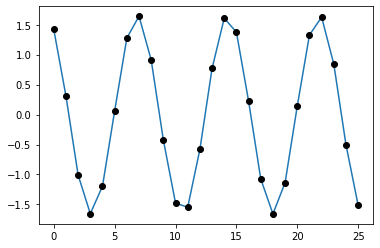

In [ ]:
from numpy import empty,zeros,copy
from pylab import plot,show

######################################################################
#
# Function to solve a banded system of linear equations using
# Gaussian elimination and backsubstitution
#
# x = banded(A,v,up,down)
#
# This function returns the vector solution x of the equation A.x = v,
# where v is an array representing a vector of N elements, either real
# or complex, and A is an N by N banded matrix with "up" nonzero
# elements above the diagonal and "down" nonzero elements below the
# diagonal.  The matrix is specified as a two-dimensional array of
# (1+up+down) by N elements with the diagonals of the original matrix
# along its rows, thus:
#
#   (  -   -  A02 A13 A24 ...
#   (  -  A01 A12 A23 A34 ...
#   ( A00 A11 A22 A33 A44 ...
#   ( A10 A21 A32 A43 A54 ...
#   ( A20 A31 A42 A53 A64 ...
#
# Elements represented by dashes are ignored -- it doesn't matter what
# these elements contain.  The size of the system is taken from the
# size of the vector v.  If the matrix A is larger than NxN then the
# extras are ignored.  If it is smaller, the program will produce an
# error.
#
# The function is compatible with version 2 and version 3 of Python.
#
# Written by Mark Newman <mejn@umich.edu>, September 4, 2011
# You may use, share, or modify this file freely
#
######################################################################
def banded(Aa,va,up,down):
    # Copy the inputs and determine the size of the system
    A = copy(Aa)
    v = copy(va)
    N = len(v)

    # Gaussian elimination
    for m in range(N):
        # Normalization factor
        div = A[up,m]

        # Update the vector first
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]

        # Now normalize the pivot row of A and subtract from lower ones
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]

    # Backsubstitution
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]
    return v

# Constants
N = 26
C = 1.0
m = 1.0
k = 6.0
omega = 2.0
alpha = 2*k-m*omega*omega

# Set up the initial values of the arrays
A = empty([3,N],float)
for i in range(N):
    A[0,i] = -k
    A[1,i] = alpha
    A[2,i] = -k
A[1,0] = alpha - k
A[1,N-1] = alpha - k

v = zeros(N,float)
v[0] = C

# Solve the equations
x = banded(A,v,1,1)

# Make a plot using both dots and lines
plot(x)
plot(x,"ko")
show()

# LU decomposition

Let $A = \begin{pmatrix}
2 & 3 & 4\\
5 & 6 & 7 \\
8 & 9 & 1
\end{pmatrix}
$

if we define  $L0 = 1/2 * \begin{pmatrix}
1 & 0 & 0\\
-5 & 2 & 0 \\
-8 & 0 & 2
\end{pmatrix}
$, we will have  $L_0 A = \begin{pmatrix}
1 & 1.5 & 2\\
0 & -1.5 & -3 \\
0 & -3 & -15
\end{pmatrix}
$

now if we define  $L_1 = 1/(-1.5)*\begin{pmatrix}
-1.5 & 0 & 0\\
0 & 1 & 0 \\
0 & 3 & -1.5
\end{pmatrix}
$, we will have $L_1 L_0 A = \begin{pmatrix}
1. & 1.5 & 2\\
0 & 1 & 2 \\
0 & 0 & -9
\end{pmatrix}
$

now if we define  $L_2 = 1/(-9)*\begin{pmatrix}
-9 & 0 & 0\\
0 & -9 & 0 \\
0 & 0 & 1
\end{pmatrix}
$, we will have $U=L_2 L_1 L_0 A = \begin{pmatrix}
1. & 1.5 & 2\\
0 & 1 & 2 \\
0 & 0 & 1
\end{pmatrix}
$

We also have $L_0^{-1} = \begin{pmatrix}
2 & 0 & 0\\
5 & 1 & 0 \\
8 & 0 & 1
\end{pmatrix}
$, $L_1^{-1} = \begin{pmatrix}
1 & 0 & 0\\
0 & -1.5 & 0 \\
0 & -3 & 1
\end{pmatrix}
$ and $L_2^{-1} = \begin{pmatrix}
1 & 0 & 0\\
0 & 1 & 0 \\
0 & 0 & -9
\end{pmatrix}
$ and $L=L_0^{-1}L_1^{-1}L_2^{-1} = \begin{pmatrix}
2 & 0 & 0\\
5 & -1.5 & 0 \\
8 & -3 & -9
\end{pmatrix}
$ 

We also have $LU=A$

In [ ]:
import pprint
import numpy as np

# Performs an LU Decomposition of A (which must be square) into A = LU. The function returns L and U.
def lu_decomposition(A):
    n = len(A)

    # Create zero matrices for L and U                                                                                                                                                                                                                 
    L = np.zeros((n, n), float)
    U = np.zeros((n, n), float)

    # Perform the LU Decomposition                                                                                                                                                                                                                     
    for j in range(n):
        # All diagonal entries of L are set to unity                                                                                                                                                                                                   
        L[j][j] = 1.0

        # calculate U: u_{ij} = a_{ij} - \sum_{k=0}^{i-1} u_{kj} l_{ik} for i<=j                                                                                                                                                                                  
        for i in range(j+1):
            s1 = 0.
            for k in range(i):
                s1 += U[k][j] * L[i][k]
            U[i][j] = A[i][j] - s1

        # calculate L: l_{ij} = \frac{1}{u_{jj}} (a_{ij} - \sum_{k=0}^{j-1} u_{kj} l_{ik} ) for i>=j                                                                                                                                                         
        for i in range(j, n):            
            s2 = 0.
            for k in range(j):
                s2 += U[k][j] * L[i][k]            
            L[i][j] = (A[i][j] - s2) / U[j][j]

    return (L, U)

A = [[7, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6]]
L, U = lu_decomposition(A)

print("A:")
pprint.pprint(A)

print("L:")
pprint.pprint(L)

print("U:")
pprint.pprint(U)

print("LU:")
pprint.pprint(L@U)

A:
[[7, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6]]
L:
array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.42857143,  1.        ,  0.        ,  0.        ],
       [-0.14285714,  0.21276596,  1.        ,  0.        ],
       [ 0.28571429, -0.72340426,  0.08982036,  1.        ]])
U:
array([[ 7.        ,  3.        , -1.        ,  2.        ],
       [ 0.        ,  6.71428571,  1.42857143, -4.85714286],
       [ 0.        ,  0.        ,  3.55319149,  0.31914894],
       [ 0.        ,  0.        ,  0.        ,  1.88622754]])
LU:
array([[ 7.,  3., -1.,  2.],
       [ 3.,  8.,  1., -4.],
       [-1.,  1.,  4., -1.],
       [ 2., -4., -1.,  6.]])


**LU decomposition with pivoting**

In [ ]:
import pprint
import numpy as np
import scipy.linalg 

# Creates the permutation matrix for m
# a proper permutation in rows is often sufficient for LU decomposition
def permutation(m):
    n = len(m)
    ID = [[float(i == j) for i in range(n)] for j in range(n)]   # create an identity matrix first  

    for j in range(n):
        row = max(range(j, n), key=lambda i: abs(m[i][j]))
        if j != row:
            ID[j], ID[row] = ID[row], ID[j]

    return ID
 
 # Decomposes a nxn matrix A by PA=LU and returns L, U and P
def LU_permutation(A):
    n = len(A)

    # define zero matrices for L and U first
    L = np.zeros((n, n), float)
    U = np.zeros((n, n), float)
    
    # find out the permutation matrix and calculate PA
    P = permutation(A)
    A2 = P@A
    print("A = ", A)
    print("P = ", P)
    print("PA = ", A2)

     # Perform the LU Decomposition                                                                                                                                                                                                                     
    for j in range(n):
        # All diagonal entries of L are set to 1                                                                                                                                                                                                  
        L[j][j] = 1.0

        # calculate U: u_{ij} = a_{ij} - \sum_{k=0}^{i-1} u_{kj} l_{ik} for i<=j                                                                                                                                                                                  
        for i in range(j+1):
            s1 = 0.
            for k in range(i):
                s1 += U[k][j] * L[i][k]
            U[i][j] = A2[i][j] - s1

        # calculate L: l_{ij} = \frac{1}{u_{jj}} (a_{ij} - \sum_{k=0}^{j-1} u_{kj} l_{ik} ) for i>=j                                                                                                                                                         
        for i in range(j, n):            
            s2 = 0.
            for k in range(j):
                s2 += U[k][j] * L[i][k]            
            L[i][j] = (A2[i][j] - s2) / U[j][j]
            
    print("L = ", L)
    print("U = ", U)
    return (L, U, P)
 
A = np.array([[1, 3, 5], [2, 4, 7], [3, 1, 0]], float)
L, U, P = LU_permutation(A)

print("LU = ", L@U)

print("\nFrom scipy linalg:")
P, L, U = scipy.linalg.lu(A)
print("PA = ")
pprint.pprint(P@A)
print("LU = ")
pprint.pprint(L@U)

A =  [[1. 3. 5.]
 [2. 4. 7.]
 [3. 1. 0.]]
P =  [[0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0]]
PA =  [[3. 1. 0.]
 [2. 4. 7.]
 [1. 3. 5.]]
L =  [[1.         0.         0.        ]
 [0.66666667 1.         0.        ]
 [0.33333333 0.8        1.        ]]
U =  [[ 3.          1.          0.        ]
 [ 0.          3.33333333  7.        ]
 [ 0.          0.         -0.6       ]]
LU =  [[3. 1. 0.]
 [2. 4. 7.]
 [1. 3. 5.]]

From scipy linalg:
PA = 
array([[3., 1., 0.],
       [2., 4., 7.],
       [1., 3., 5.]])
LU = 
array([[3., 1., 0.],
       [2., 4., 7.],
       [1., 3., 5.]])


**LU decomposition with pivoting and backsubstitution to solve linear equations**

In [ ]:
import pprint
import numpy as np
    
# first do LU decomposition, and then solve linear equations
def SolveLinEqns(A, V):
    n = len(A)

    # LU decomposition
    L, U, P = LU_permutation(A)
    Vnew = P@V 

    # substituion Ly = V_new
    y = np.empty(n, float)
    for i in range(0, n, 1):
        y[i] = Vnew[i]/L[i][i]
        for k in range(0, i, 1):
            y[i] -= y[k]*L[i][k]

    # backsubstituion UX = y
    x = np.empty(n, float)
    for m in range(n-1, -1, -1):
        x[m] = y[m]/U[m][m]
        for i in range(m+1, n):
            x[m] -= U[m][i]/U[m][m]*x[i]
            
    return x

A = np.array([[1, 1, 1], [0, 2, 5], [2, 5, -1]], float)
V = np.array([6, -4, 27], float)
X = SolveLinEqns(A, V)  # expect 5, 3, -2
print("X = ", X)

Xlinalg = np.linalg.inv(A)@V
print("\nX from linalg = ")
print(Xlinalg)

A =  [[ 1.  1.  1.]
 [ 0.  2.  5.]
 [ 2.  5. -1.]]
P =  [[0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0]]
PA =  [[ 2.  5. -1.]
 [ 1.  1.  1.]
 [ 0.  2.  5.]]
L =  [[ 1.          0.          0.        ]
 [ 0.5         1.          0.        ]
 [ 0.         -1.33333333  1.        ]]
U =  [[ 2.   5.  -1. ]
 [ 0.  -1.5  1.5]
 [ 0.   0.   7. ]]
X =  [ 5.  3. -2.]

X from linalg = 
[ 5.  3. -2.]


**Inverse matrix**

We can use LU decomposition (or Gaussian elimination) to find the inverse matrix

$AX = V$

we have to solve for each column of $X$ separately, in terms of hte corresponding column of $I$.

If we set $V=I$, we will have $X=A^{-1}$.

**Determinant using LU decomposition**

Since $PA = LU$, we have $A=P^{-1}LU$ and $|A| = |P^{-1}| \cdot |L| \cdot |U| = (-1)^s \left(\Pi_{i=1}^{n} \ell_{ii} \right) \left( \Pi_{i=1}^{n} u_{ii} \right) = (-1)^s \left( \Pi_{i=1}^{n} u_{ii} \right)$

$S$ is the number of row exchanges in the decomposition. For lower or upper triangular matrix, the determinant is the product of all diagonal elements.


# QR decomposition

In [ ]:
import numpy as np
import pprint as pprint

# use the Gram-Schmidt algorithm for QR decomposition
# The Gram-Schmidt process is inherently numerically unstable. 
# While the application of the projections has an appealing geometric 
# analogy to orthogonalization, the orthogonalization itself is prone 
# to numerical error. A significant advantage however is the ease of implementation.

def Gram_Schmidt(A):
    N = len(A)
    Q = np.zeros(A.shape, float)
    
    for j in range(0, N):
        q = A[:, j]
        for i in range(j):
            rij = np.vdot(q, Q[:, i])
            q = q - rij*Q[:, i]

        qjj_norm = np.linalg.norm(q, ord=2)

        if np.isclose(qjj_norm, 0.0):
            raise ValueError("invalid input matrix")
        else:
            Q[:, j] = q/qjj_norm

    # Compute upper triangular matrix R
    # since Q is an orthogonal matrix, we have Q Q^T = I
    # since A=QR, we have R = Q^T A
    R = np.dot(Q.T, A)

    return (Q, R)

A = np.array([ [1, 4, 8, 4],
             [4, 2, 3, 7],
             [8, 3, 6, 9],
             [4, 7, 9, 2] ])

Q, R = Gram_Schmidt(A)
pprint.pprint(Q)
pprint.pprint(R)
pprint.pprint(Q@R)

print("\nFrom np.linalg")
q, r = np.linalg.qr(A)
print("Q:")
pprint.pprint(q)
print("R:")
pprint.pprint(r)
pprint.pprint(q@r)

array([[ 0.10153462,  0.558463  ,  0.80981107,  0.1483773 ],
       [ 0.40613847, -0.10686638, -0.14147555,  0.8964462 ],
       [ 0.81227693, -0.38092692,  0.22995024, -0.37712564],
       [ 0.40613847,  0.72910447, -0.5208777 , -0.17928924]])
array([[ 9.84885780e+00,  6.49821546e+00,  1.05596001e+01,
         1.13718770e+01],
       [-3.55271368e-15,  5.98106979e+00,  8.42348360e+00,
        -4.84345998e-01],
       [ 3.99680289e-15,  2.77555756e-15,  2.74586406e+00,
         3.27671222e+00],
       [-1.54321000e-14, -1.02418074e-14, -1.61815006e-14,
         3.11592335e+00]])
array([[1., 4., 8., 4.],
       [4., 2., 3., 7.],
       [8., 3., 6., 9.],
       [4., 7., 9., 2.]])

From np.linalg
Q:
array([[-0.10153462,  0.558463  ,  0.80981107,  0.1483773 ],
       [-0.40613847, -0.10686638, -0.14147555,  0.8964462 ],
       [-0.81227693, -0.38092692,  0.22995024, -0.37712564],
       [-0.40613847,  0.72910447, -0.5208777 , -0.17928924]])
R:
array([[ -9.8488578 ,  -6.49821546, -10.559600

**Solve linear equations using QR decomposition**

If we can do QR decomposition, we can use it to solve linear equations $AX=V$. Since $A=QR$ and $Q^TQ=I$, we have $RX=Q^TV$ (here there is no need to calculate the inverse matrix for $Q$, should be just $Q^T$). $R$ is an upper triangular matrix and thus we can directly apply backsubstitution. 

**Eigenvalues and eigenvectors**

In [ ]:
import numpy as np
import scipy.linalg as linalg
import pprint as pprint

def qr_iteration(A):

    # start with an identity matrix
    V = np.identity(len(A))
    for i in range(50):           # can stop the run in an adapative way to check the off-diagonal element        
        Q, R = Gram_Schmidt(A)     # use personally-developed Gram Schmidt algorithm for QR decomposition
        A = np.dot(R, Q)
        V = np.dot(V, Q)
        pprint.pprint(A)
    return A, V

A = np.array([ [1, 4, 8],
            [4, 2, 3],
            [8, 3, 6]], float)

w, v = np.linalg.eig(A)  # use linear algorithm algorithm for QR decomposition
c, d = qr_iteration(A)

print("From linalg:")
print(w)   
print(v) 

print("\nFrom qr_iteration:")
print(c) 
print(d) 

array([[ 9.49382716,  7.95755096,  0.79438547],
       [ 7.95755096, -0.87939221, -0.1377018 ],
       [ 0.79438547, -0.1377018 ,  0.38556505]])
array([[13.06313597,  3.75968662,  0.02574828],
       [ 3.75968662, -4.46321537, -0.03399067],
       [ 0.02574828, -0.03399067,  0.40007941]])
array([[ 1.37210176e+01,  1.47399997e+00,  7.58286808e-04],
       [ 1.47399997e+00, -5.12133308e+00, -2.89184722e-03],
       [ 7.58286808e-04, -2.89184722e-03,  4.00315432e-01]])
array([[ 1.38191295e+01,  5.60706587e-01,  2.19968041e-05],
       [ 5.60706587e-01, -5.21944647e+00, -2.24376789e-04],
       [ 2.19968041e-05, -2.24376789e-04,  4.00316938e-01]])
array([[ 1.38332640e+01,  2.12350805e-01,  6.36686555e-07],
       [ 2.12350805e-01, -5.23358090e+00, -1.71908643e-05],
       [ 6.36686556e-07, -1.71908643e-05,  4.00316947e-01]])
array([[ 1.38352899e+01,  8.03704277e-02,  1.84227227e-08],
       [ 8.03704277e-02, -5.23560690e+00, -1.31473107e-06],
       [ 1.84227232e-08, -1.31473107e-06,  4.00